In [1]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

In [2]:
def sigmoid(features_train,theta):
    sig = 1/(1 + np.exp(-hypothesis(features_train,theta)))
    return sig

In [3]:
def hypothesis(features_train, theta):
    z = np.dot(theta,features_train.T)
    return z

In [4]:
def predict(x, y, theta):
    predict = sigmoid(x,theta)
    predictnext = predict
    for i in range(len(predict[0])):
        if(predict[0][i]>=0.5):
            predict[0][i] = 1
        else:
            predict[0][i] = 0
    print("Predicted Values")
    print(predict.astype(int))
    return predictnext

In [5]:
def gradient_ascent(X,theta,y):
    grad = np.dot(X.T, y - (sigmoid(X,theta).T))
    return grad

In [6]:
def update_weight_mle(weight, learning_rate, gradient):
    updated = np.multiply(gradient,learning_rate)
    latest = np.add(weight,updated.T)
    return latest

In [7]:
def plot_output(X,y):
    X_new = X.iloc[:, 1:]
    z = X_new[y == 0]
    z2 = X_new[y ==1]
    plt.scatter(z.iloc[:, 0], z.iloc[:, 1], color='r', label='0 = non-virginica')
    plt.scatter(z2.iloc[:, 0], z2.iloc[:, 1], color='b', label='1 = virginica')
    plt.legend()
    plt.xlabel('sepal length', fontsize='13')
    plt.ylabel('sepal width', fontsize='13')
    plt.title('Logistic Regression output for the test data-set', fontsize='13')
    plt.show()

In [8]:
def log_likelihood(x, y, weights):
    ll = np.sum(np.dot(y,hypothesis(x,weights)) - np.log(1 + np.exp(hypothesis(x,weights))))
    return ll

In [9]:
iris = pd.read_csv(r'/Users/vedadnya_98/Desktop/HomeWork Zips/Machine Learning/Assignment 1/iris.csv')
iris = shuffle(iris)

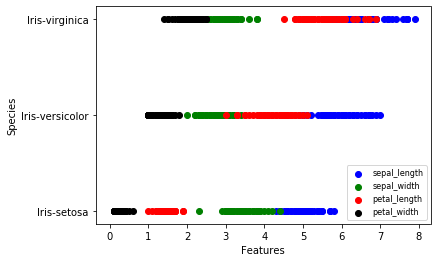

In [10]:
# Plot the relation of each feature with each species

plt.xlabel('Features')
plt.ylabel('Species')

pltX = iris.loc[:, 'sepal_length']
pltY = iris.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = iris.loc[:, 'sepal_width']
pltY = iris.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = iris.loc[:, 'petal_length']
pltY = iris.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = iris.loc[:, 'petal_width']
pltY = iris.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [11]:
iris.info()
mapping = {
    'Iris-virginica' : 1,
    'Iris-versicolor': 0,
    'Iris-setosa'    : 0
}
rows, col = iris.shape
bias = np.ones(len(iris))
X = iris.loc[:,['sepal_length','sepal_width']]
X.insert(0,'bias',bias)
lables = iris.species.replace(mapping).values.reshape(rows,1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 17 to 91
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [12]:
feature_train, feature_test = X[0:99], X[100:]
lables_train, lables_test = lables[0:99], lables[100:]

In [13]:
theta = np.zeros(3,dtype='int')
theta = theta.reshape(1,3)
learning_rate = 0.01
iters = 50000
likelihood = np.zeros(iters)

for i in range(iters):
    gradient = gradient_ascent(feature_test,theta,lables_test)
    theta = update_weight_mle(theta, learning_rate, gradient)
    likelihood[i] = log_likelihood(feature_train, lables_train, theta)
print(likelihood)
print(theta)

[-16654.44511599 -12495.5862611  -39151.7491183  ... -13704.61013121
 -15990.82154035 -13704.61013121]
[[-25.49877134   3.73197456   0.56491633]]


In [14]:
predictednext = predict(feature_train, lables_train, theta)

Predicted Values
[[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
  0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0]]


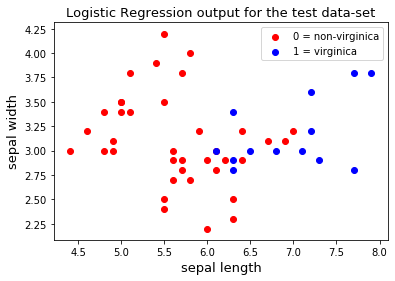

In [15]:
plot_output(feature_test, lables_test)